In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import kagglehub
import matplotlib.pyplot as plt


In [8]:
!unzip "/content/archive (3).zip" -d "/content/"

Archive:  /content/archive (3).zip
  inflating: /content/heart.csv      


In [9]:
df=pd.read_csv("/content/heart.csv")

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [12]:
df.duplicated().sum()

1

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


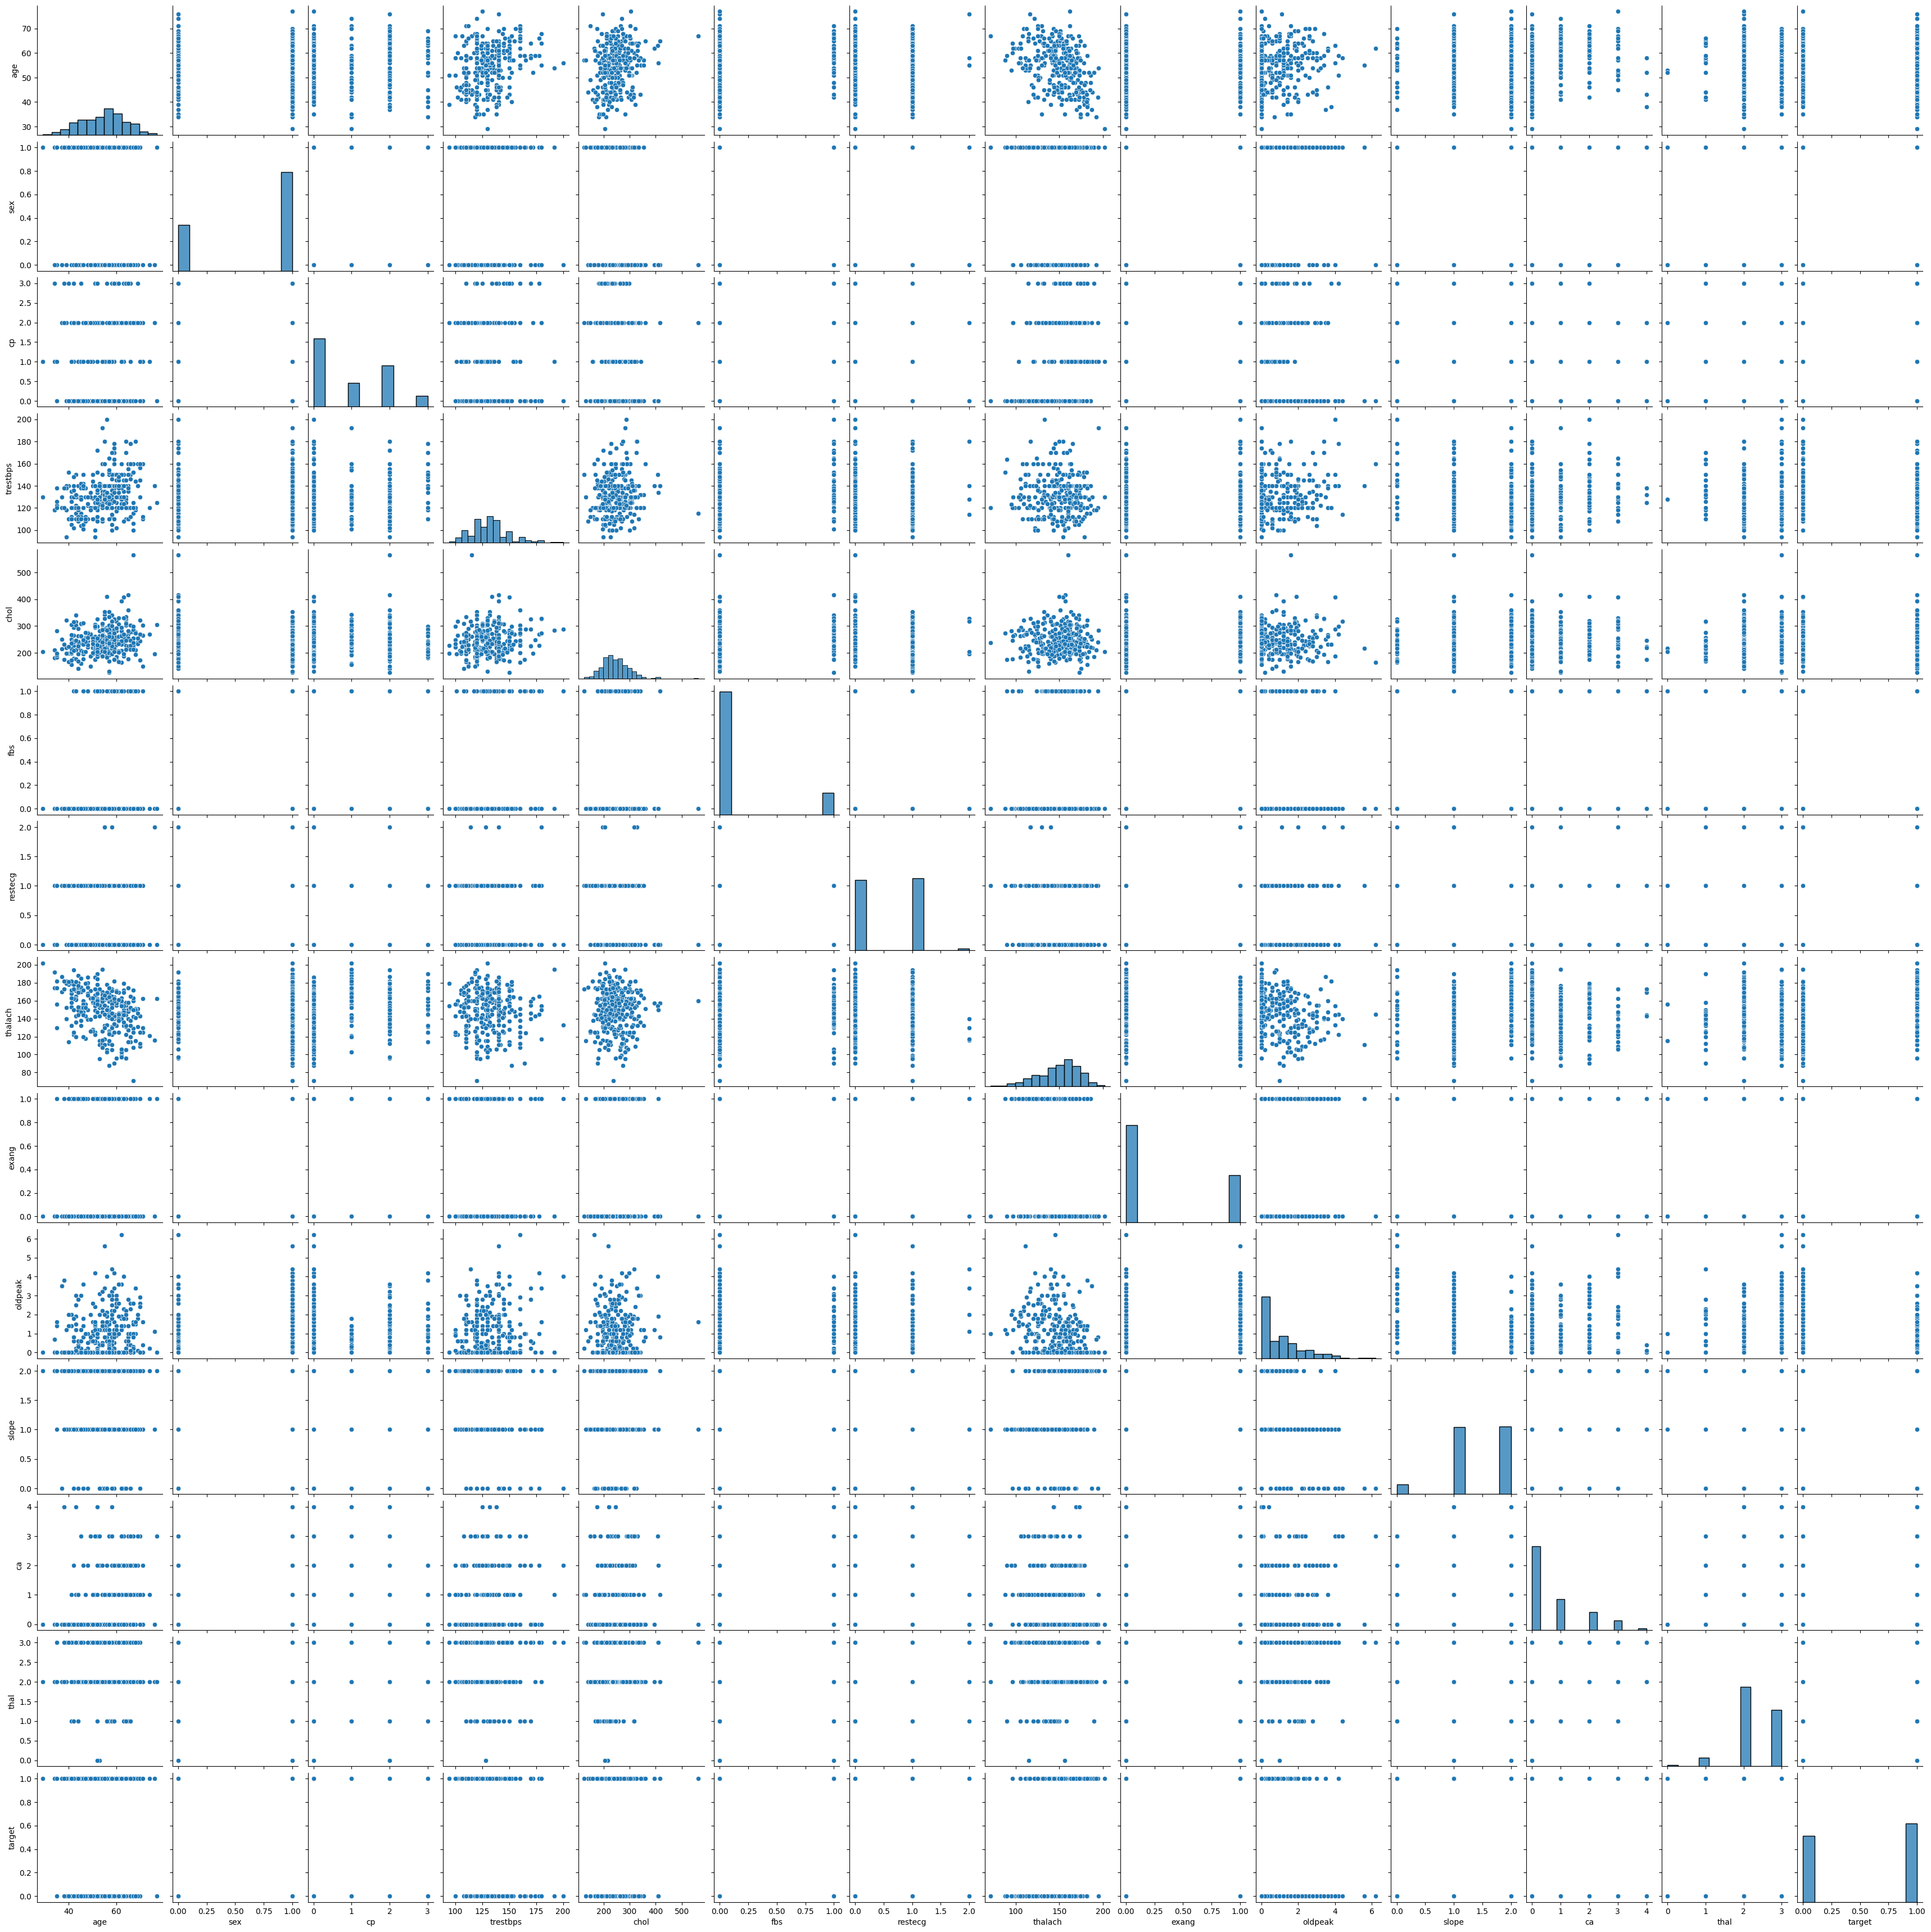

In [16]:
sns.pairplot(df)

In [17]:
X=df.drop("target",axis=1)
y=df["target"]

<Axes: >

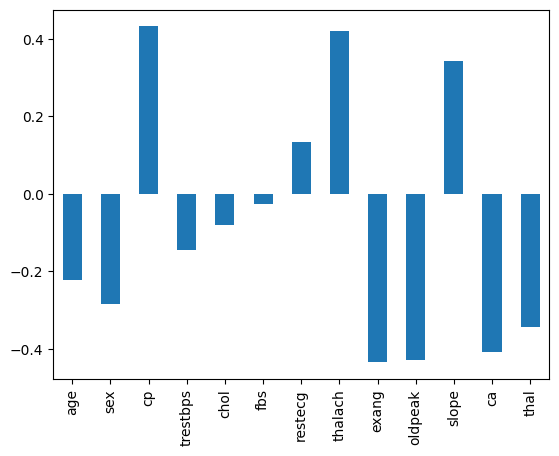

In [18]:
correlation=X.corrwith(y)
correlation.plot(kind="bar")

In [19]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [20]:
sc=StandardScaler()

In [21]:
X.drop("fbs",axis=1,inplace=True)

In [22]:
X_scaled=sc.fit_transform(X)

In [23]:
ms=MinMaxScaler()

In [24]:
X_minmax_scaled=ms.fit_transform(X)

<Axes: >

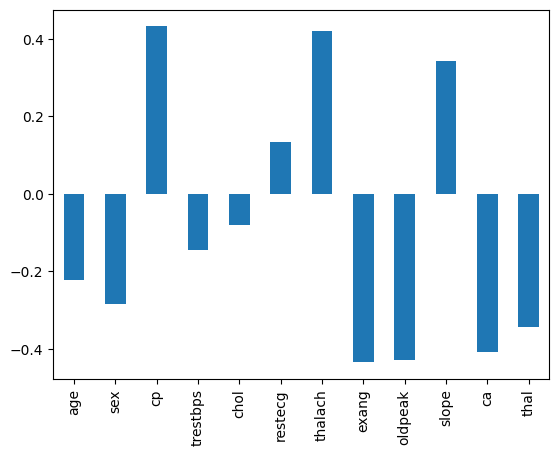

In [25]:
correlation=X.corrwith(y)
correlation.plot(kind="bar")

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [28]:
len(X_test)

61

In [29]:
len(X_train)

241

In [30]:
df.shape

(302, 14)

In [31]:
#Classification algorithms
#logistic regression
from sklearn.linear_model import LogisticRegression

In [32]:
lr=LogisticRegression()

In [33]:
lr.fit(X_train,y_train)

LogisticRegression()

In [34]:
lr_result=lr.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
print("Accuracy: ",accuracy_score(y_test,lr_result))

Accuracy:  0.819672131147541


In [37]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

In [38]:
dc=DecisionTreeClassifier(max_depth=20)

In [39]:
dc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=20)

In [40]:
dc_result=dc.predict(X_test)

In [41]:
print("accuracy:",accuracy_score(y_test,dc_result))

accuracy: 0.8032786885245902


In [42]:
#Randomforestclassifier
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfc=RandomForestClassifier(n_estimators=20)

In [44]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [45]:
rfc_result=rfc.predict(X_test)

In [46]:
print("accuracy:",accuracy_score(y_test,rfc_result))

accuracy: 0.8524590163934426


In [47]:
from sklearn.svm import SVC

In [48]:
sv=SVC(kernel="linear")

In [49]:
sv.fit(X_train,y_train)

SVC(kernel='linear')

In [50]:
sv_result=sv.predict(X_test)

In [51]:
print("accuracy",accuracy_score(y_test,sv_result))

accuracy 0.8688524590163934


In [52]:
from sklearn.naive_bayes import GaussianNB

In [53]:
gb=GaussianNB()

In [54]:
gb.fit(X_train,y_train)

GaussianNB()

In [56]:
gb_result=gb.predict(X_test)

In [58]:
print("accuracy:",accuracy_score(y_test,gb_result))

accuracy: 0.8852459016393442
